In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

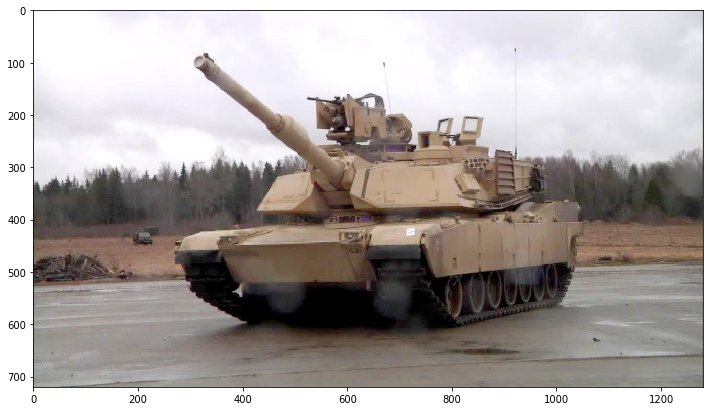

In [18]:
abrams_train = cv2.imread('abrams_not_abrams/train/abrams/maxresdefault_(8).jpg')
abrams_train = cv2.cvtColor(abrams_train,cv2.COLOR_BGR2RGB)
display(abrams_train)

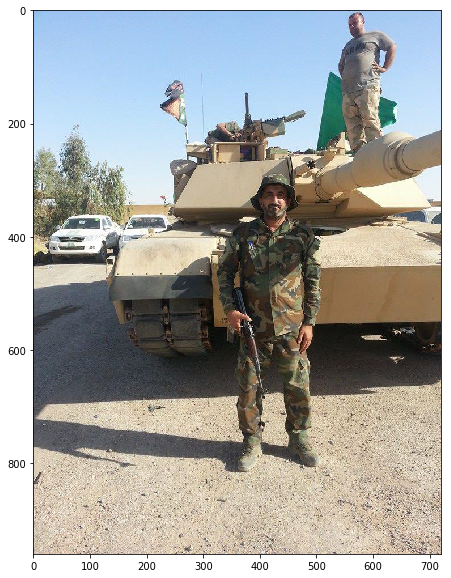

In [19]:
test_img1 = cv2.imread('abrams_not_abrams/badr_abrams_1.jpg')
test_img1 = cv2.cvtColor(test_img1,cv2.COLOR_BGR2RGB)
display(test_img1)

In [66]:
# FLANN (FAST LIBRARY APPROXIMATE NEAREST NEIGHBORS)
def show_matching_features(image1,image2):
    sift = cv2.xfeatures2d.SIFT_create()

    kp1, des1 = sift.detectAndCompute(image1,None)
    kp2, des2 = sift.detectAndCompute(image2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=20)
    search_params = dict(checks=75)

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    matches = flann.knnMatch(des1,des2,k=2) # drawing mask

    # Draw good matches
    matchesMask = [[0,0] for i in range(len(matches))]

    # Ratio test to weed out bad matches
    # Good matches are defined where the distance for the first and second matches is close 
    for i,(match1,match2) in enumerate(matches):
        if match1.distance < 0.7 * match2.distance:
            matchesMask[i] = [1,0]

    draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=(255,0,0),
                       matchesMask=matchesMask,
                       flags=0)

    flann_matches = cv2.drawMatchesKnn(image1,kp1,image2,kp2,matches,None,**draw_params)
    return display(flann_matches)

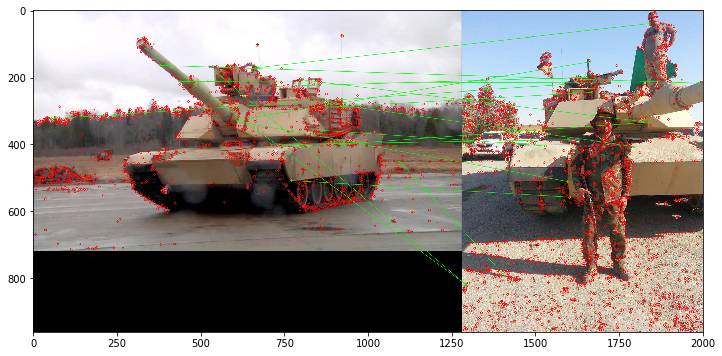

In [67]:
show_matching_features(abrams_train,test_img1)
# Green lines are matches
# Red points are features found to match on

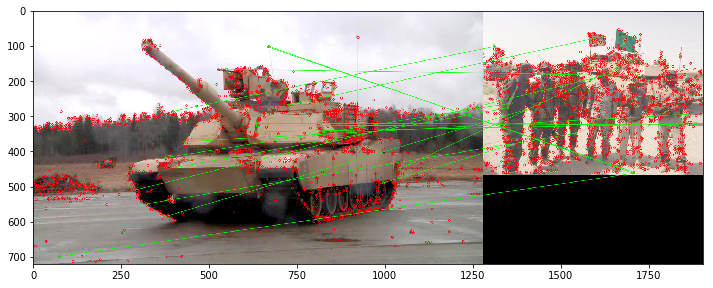

In [68]:
image2 = cv2.imread('abrams_not_abrams/badr_abrams_2.jpg')
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

show_matching_features(abrams_train,image2)

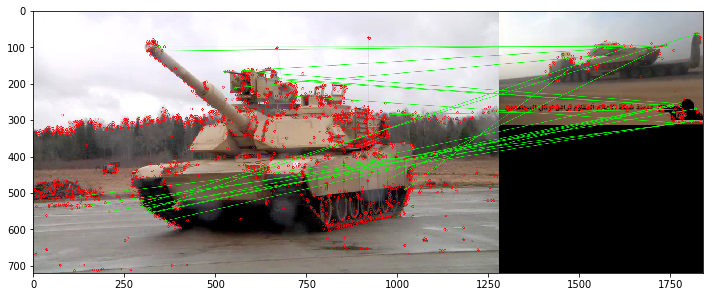

In [69]:
image2 = cv2.imread('abrams_not_abrams/KH_abrams_1.jpg')
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

show_matching_features(abrams_train,image2)

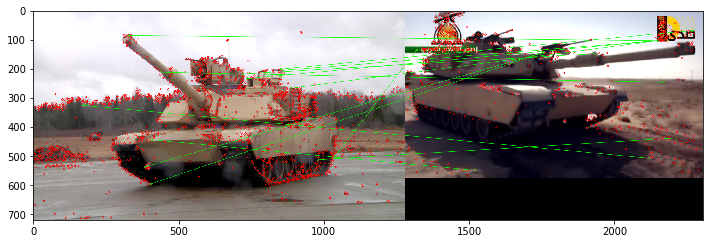

In [70]:
image2 = cv2.imread('abrams_not_abrams/KH_abrams_2_jpg.jpg')
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

show_matching_features(abrams_train,image2)

Despite our model being able to determine that three of the four test images were indeed Abrams tanks, the FLANN feature matcher seems to be drawn to unrelated features between the two images. It is worth noting that the red dots do highlight some of the more distinctive features on the baseline image of the tank such as the treads and sides.